In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day37-handling-missing-categorical-data\train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [7]:
df['GarageQual'].mode()

0    TA
dtype: object

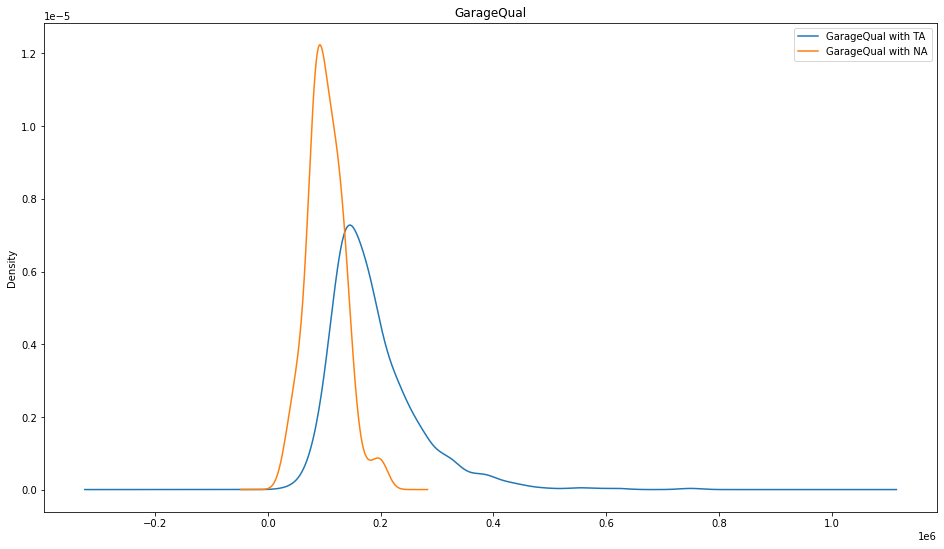

In [18]:
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax)
lines,labels=ax.get_legend_handles_labels()
labels=['GarageQual with TA','GarageQual with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')
plt.show()

Let impute NA value with Ta

In [19]:
temp=df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA',inplace=True)

Text(0.5, 1.0, 'GarageQual')

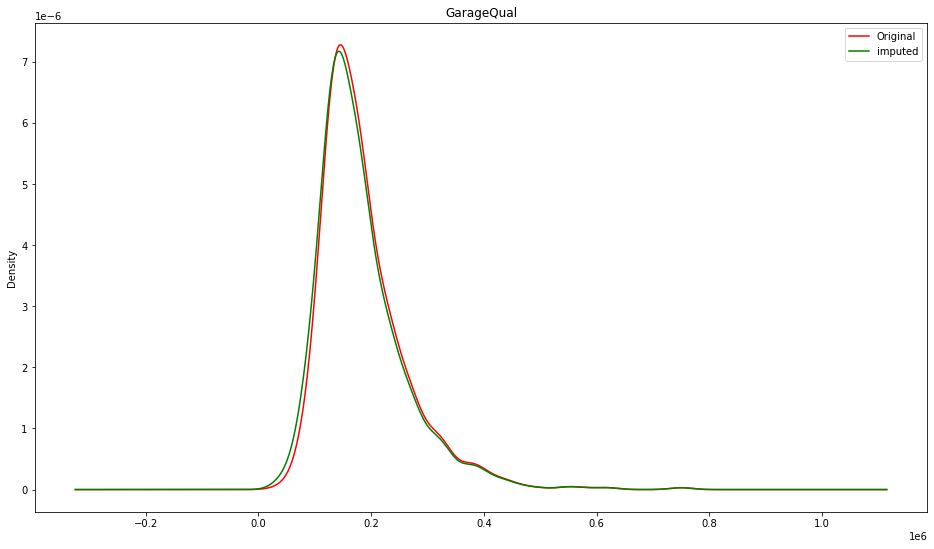

In [22]:
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
temp.plot(kind='kde',ax=ax,color='r')
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='g')
lines,labels=ax.get_legend_handles_labels()
labels=['Original','imputed']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')
plt.title('GarageQual')

<AxesSubplot:>

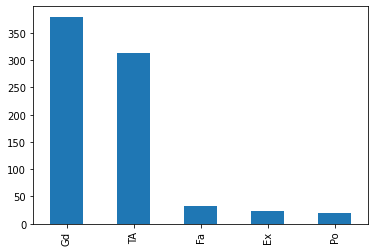

In [23]:
df['FireplaceQu'].value_counts().plot(kind='bar')

FirePlacequ has almost 50% null value

In [24]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

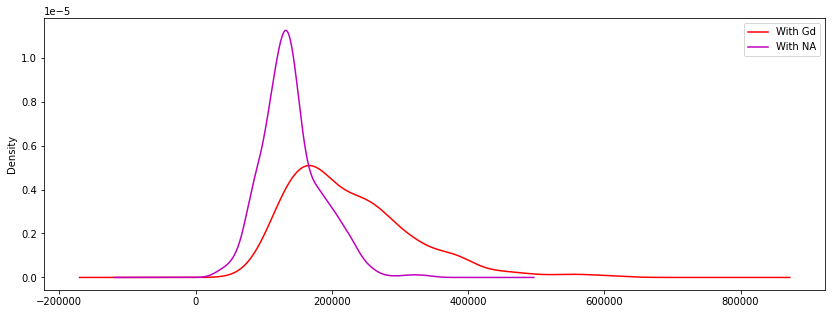

In [32]:
fig=plt.figure(figsize=(14,5))
ax=plt.subplot(1,1,1)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='r')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',color='m')
lines,labels=ax.get_legend_handles_labels()
labels=['With Gd','With NA']
ax.legend(lines,labels,loc='best')

though there is large percent of null value.Let us impute with its mode

In [34]:
temp2=df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd',inplace=True)

<AxesSubplot:ylabel='Density'>

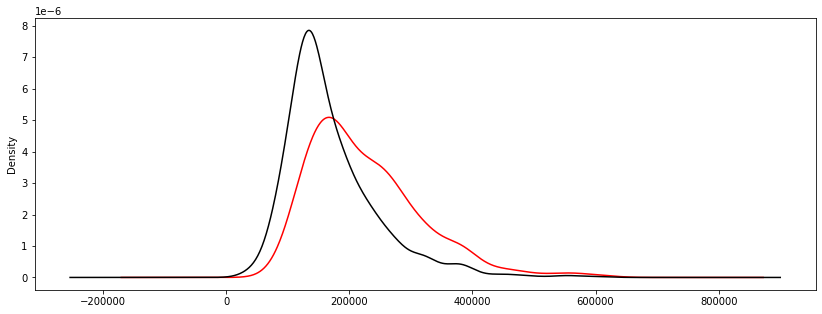

In [36]:
fig=plt.figure(figsize=(14,5))
ax=plt.subplot(111)
temp2.plot(kind='kde',ax=ax,color='r')
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='k')

Though we have impute its mode but its distribution remains non uniform

So in this we impute the null values with other variable say 'Missing'

In [46]:
df1=pd.read_csv(r"C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day37-handling-missing-categorical-data\train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
df['']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.2,random_state=43)

In [39]:
X_train.head()

,FireplaceQu,GarageQual
676,Gd,Fa
990,TA,TA
71,Gd,TA
979,Gd,TA
946,TA,TA


In [45]:
X_train.isnull().sum()

FireplaceQu    0
GarageQual     0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

In [44]:
imputer=SimpleImputer(strategy='constant',fill_value='Missing')

In [ ]:
X_trai